##  Q1. 3 Datasets:
- MNIST
- Spambase
- 20NG

For each, perform 2 classification algorithms:
- L2-reg Logistic Regression
- Decision Trees


allowed to use library for classification. 

allowed to use library to process data in appropriate formats.

You are required to explain/analyze the model trained in terms of features : for each of the 6 runs list the top F=30 features. 

For the Regression these correspond to the highest-absolute-value F coefficients; 

for Decision Tree they are the first F splits. In particular for Decision Tree on 20NG, report performance for two tree sizes ( by depths of the tree, or number of leaves, or number of splits )

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch as torch
from sklearn.datasets import _twenty_newsgroups
from torchvision import datasets, transforms

# MNIST

In [3]:
# Load the MNIST dataset
mnist_dataset = datasets.MNIST(root='data', download=True, transform=transforms.ToTensor())
features = mnist_dataset.data
labels = mnist_dataset.targets

# Normalize the features
features = features / 255.0

In [4]:
# using pytorch to perform logistic regression:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))
    
# Initialize the model, loss function, and optimizer
input_dim = 28 * 28  # MNIST images are 28x28 pixels
output_dim = 10  # 10 classes for digits 0-9
model = LogisticRegression(input_dim, output_dim)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Prepare the data for training
features = features.view(-1, input_dim).float()
labels = labels.long()

# Training loop
num_epochs = 5
batch_size = 64
num_batches = len(features) // batch_size
for epoch in range(num_epochs):
    for i in range(num_batches):
        # Get the batch data
        batch_features = features[i * batch_size:(i + 1) * batch_size]
        batch_labels = labels[i * batch_size:(i + 1) * batch_size]
        
        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    correct = 0
    total = 0
    for i in range(num_batches):
        batch_features = features[i * batch_size:(i + 1) * batch_size]
        batch_labels = labels[i * batch_size:(i + 1) * batch_size]
        
        outputs = model(batch_features)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()
    accuracy = correct / total
print(f'Accuracy of the model on the MNIST test images: {accuracy * 100:.2f}%')


Epoch [1/5], Loss: 2.0256
Epoch [2/5], Loss: 1.9221
Epoch [3/5], Loss: 1.8671
Epoch [4/5], Loss: 1.8316
Epoch [5/5], Loss: 1.8061
Accuracy of the model on the MNIST test images: 84.09%


In [5]:
# Analyze model in terms of features, d = top 30 features
def analyze_model(model, input_dim):
    weights = model.linear.weight.data.numpy()
    top_features = np.argsort(np.abs(weights), axis=1)[:, -30:]  # Get top 30 features for each class
    return top_features
top_features = analyze_model(model, input_dim)

print("Top 30 features for each class:")
for i in range(output_dim):
    print(f"Class {i}: {top_features[i]}")

Top 30 features for each class:
Class 0: [404 511 492 464 352 437 405 378 460 491 377 432 353 490 489 351 433 463
 379 380 434 407 381 409 436 406 461 462 408 435]
Class 1: [374 550 521 318 377 410 347 489 290 437 375 402 517 464 379 403 490 433
 351 295 461 465 409 462 434 322 406 378 323 350]
Class 2: [581 372 289 293 152 349 540 401 375 542 655 322 350 316 568 657 656 320
 630 658 344 292 318 374 345 348 373 347 319 346]
Class 3: [572 288 349 459 318 178 544 486 545 542 461 543 376 463 491 345 263 291
 289 290 487 317 515 516 462 489 518 488 517 490]
Class 4: [599 431 436 213 181 457 373 598 568 399 374 430 571 182 237 428 266 209
 211 569 184 570 210 401 429 183 400 239 238 212]
Class 5: [457 248 324 191 320 376 247 403 328 329 353 352 402 517 354 298 488 325
 319 297 218 348 299 355 326 346 347 374 327 375]
Class 6: [213 244 486 573 102 268 214 541 272 514 298 513 655 544 572 215 658 297
 656 296 515 270 241 543 657 542 242 243 269 271]
Class 7: [186 401 155 461 373 267 458 350 18

In [6]:
# Using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
mnist_dataset_train = datasets.MNIST(root='data', train = True, download=True)

mnist_dataset = datasets.MNIST(root='data', train = False, download=True)
print(mnist_dataset_train.data.shape)
print(mnist_dataset.data.shape)
# Train features, labels
features = mnist_dataset_train.data
labels = mnist_dataset_train.targets

# Test features, labels
test_features = mnist_dataset.data
test_labels = mnist_dataset.targets

# convert to numpy arrays:
features = features.numpy()
labels = labels.numpy()

test_features = test_features.numpy()
test_labels = test_labels.numpy()

# Normalize the features
features = features / 255.0
test_features = test_features / 255.0

# Reshape the features to 2D array
features = features.reshape(features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree Classifier
dt_classifier.fit(features, labels)

# Predict on the testing set
dt_predictions = dt_classifier.predict(test_features)

# Calculate accuracy
dt_accuracy = accuracy_score(test_labels, dt_predictions)
print(f'Accuracy of the Decision Tree Classifier on the MNIST dataset: {dt_accuracy * 100:.2f}%')



torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
Accuracy of the Decision Tree Classifier on the MNIST dataset: 87.60%


# Spambase


In [7]:
spambase = pd.read_csv('spambase.data', header=None, sep=',')
spambase

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [8]:
# Split the dataset into features and labels
s_labels = spambase.iloc[:, -1]
s_features = spambase.iloc[:, :-1]


In [9]:
# Normalize the features
s_features = (s_features - s_features.mean()) / s_features.std()

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
s_features_train, s_features_test, s_labels_train, s_labels_test = train_test_split(s_features, s_labels, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Using logistic regression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(s_features_train, s_labels_train)

# Predict on the testing set
logistic_predictions = logistic_model.predict(s_features_test)

# Calculate accuracy
logistic_accuracy = accuracy_score(s_labels_test, logistic_predictions)
print(f'Accuracy of the Logistic Regression model on the Spambase dataset: {logistic_accuracy * 100:.2f}%')

Accuracy of the Logistic Regression model on the Spambase dataset: 91.97%


In [11]:
# Decision tree classifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree Classifier
dt_classifier.fit(s_features_train, s_labels_train)

# Predict on the testing set
dt_predictions = dt_classifier.predict(s_features_test)

# Calculate accuracy
dt_accuracy = accuracy_score(s_labels_test, dt_predictions)
print(f'Accuracy of the Decision Tree Classifier on the Spambase dataset: {dt_accuracy * 100:.2f}%')


Accuracy of the Decision Tree Classifier on the Spambase dataset: 91.53%


# 20NG

In [12]:
ng_train = _twenty_newsgroups.fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
ng_train_feat = ng_train.data
ng_train_labels = ng_train.target

ng_test = _twenty_newsgroups.fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
ng_test_feat = ng_test.data
ng_test_labels = ng_test.target

In [13]:
# TFIDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TFIDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training features
ng_train_features = tfidf_vectorizer.fit_transform(ng_train_feat)

# Transform the testing features
ng_test_features = tfidf_vectorizer.transform(ng_test_feat)


In [14]:
# Using logistic regression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(ng_train_features, ng_train_labels)

# Predict on the testing set
logistic_predictions = logistic_model.predict(ng_test_features)

# Calculate accuracy
logistic_accuracy = accuracy_score(ng_test_labels, logistic_predictions)
print(f'Accuracy of the Logistic Regression model on the 20 Newsgroups dataset: {logistic_accuracy * 100:.2f}%')

Accuracy of the Logistic Regression model on the 20 Newsgroups dataset: 64.76%


In [15]:
# Decision tree classifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree Classifier
dt_classifier.fit(ng_train_features, ng_train_labels)

# Predict on the testing set
dt_predictions = dt_classifier.predict(ng_test_features)

# Calculate accuracy
dt_accuracy = accuracy_score(ng_test_labels, dt_predictions)
print(f'Accuracy of the Decision Tree Classifier on the 20 Newsgroups dataset: {dt_accuracy * 100:.2f}%')

# get the top 30 features
def analyze_model(model, input_dim):
    weights = model.coef_
    top_features = np.argsort(np.abs(weights), axis=1)[:, -30:]  # Get top 30 features for each class
    return top_features
top_features = analyze_model(logistic_model, ng_train_features.shape[1])
print("Top 30 features for each class:")

for i in range(len(ng_train.target_names)):
    print(f"Class {i}: {top_features[i]}")

# unpack features thru the tfidf vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
top_features = np.array(top_features)
top_features_names = []
for i in range(len(ng_train.target_names)):
    top_features_names.append([feature_names[j] for j in top_features[i]])
print("Top 30 features for each class:")

for i in range(len(ng_train.target_names)):
    print(f"Class {i}: {top_features_names[i]}")


Accuracy of the Decision Tree Classifier on the 20 Newsgroups dataset: 43.72%
Top 30 features for each class:
Class 0: [ 820 4771 2449 4009  983  708 3643 2568 1391 4490 2977 2650 4231  543
 2533 3958 3773 3133 4482 2978 3601  596  731 2446  597 2445  774 2054
 3771  595]
Class 1: [ 129 2722 4972 2193 1075 4408 1965 2658 4193 3252 1068 4769 3543 1137
 4767 4246 1865 4778 3422  430 3428 1320  474 4552 1932 1867 2304  181
 2303 2082]
Class 2: [1916 1465  969 2776 4763 2874 3011 4709 2998  908  343  959 2367 1550
 2903 1965 4717 1917 3117 3102 1570 3875 1867 3521 4891 1569 1011  642
 1865 4894]
Class 3: [2874 1902  281   60 1268 2185 1063  909 2970 2162  771 3223 2271 1507
 2440 2442 2986 4800 1995  743 3435  849  204 1213 1567 2277 2969  908
 3311 4005]
Class 4: [2869 2150 4065 2766 3314 2956  869 1946 4173 2413    6 2768 1054 4143
 4005 2296 4813 2969 3521 3118 1584 4144 2607 3457 1567 3625  947 4008
  507 2764]
Class 5: [2307 3545 3419 4501 4213 1713 1077 2651 3927 3382 4958 4717 4714 

## Q2: PCA Using library (sklearn compatible)

A) For MNIST dataset, run a PCA-library to get data on D=5 features. Rerun the classification tasks from PB1, compare testing performance with the one from PB1. Then repeat this exercise for D=20

B) Run PCA library on Spambase and repeat one of the classification algorithms. What is the smallest D (number of PCA dimensions) you need to get a comparable test result?

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from torchvision import datasets, transforms
from pca import pca

In [23]:
# Load the MNIST dataset
mnist_dataset = datasets.MNIST(root='data', download=True, transform=transforms.ToTensor())
features = mnist_dataset.data
labels = mnist_dataset.targets

# Normalize the features
features = features / 255.0

features.shape


torch.Size([60000, 28, 28])

In [24]:
# a) use PCA to reduce the dimensionality of the data to d = 5:
pca = PCA(n_components=5)
features_pca = pca.fit_transform(features.view(-1, 28 * 28).numpy())

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

Explained variance ratio: [0.09704394 0.07096104 0.06169182 0.05389257 0.04867888]


In [25]:
# data now looks like:
print(features_pca.shape)

(60000, 5)


In [26]:
# Perform training, testing

# Split the dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features_pca, labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(features_train, labels_train)

# Predict on the testing set
predictions = model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 5: {accuracy * 100:.2f}%')


Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 5: 66.95%


In [27]:
# d = 20
pca = PCA(n_components=20)
features_pca = pca.fit_transform(features.view(-1, 28 * 28).numpy())

# Perform training, testing

# Split the dataset into training and testing sets

features_train, features_test, labels_train, labels_test = train_test_split(features_pca, labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(features_train, labels_train)

# Predict on the testing set
predictions = model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 20: {accuracy * 100:.2f}%')


Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 20: 87.51%


In [28]:
# B) Run PCA library on Spambase and repeat one of the classification algorithms. What is the smallest D (number of PCA dimensions) you need to get a comparable test result?

# Load the Spambase dataset
spambase = pd.read_csv('spambase.data', header=None, sep=',')
s_labels = spambase.iloc[:, -1]
s_features = spambase.iloc[:, :-1]

# Normalize the features
s_features = (s_features - s_features.mean()) / s_features.std()

# Perform PCA
pca = PCA(n_components=1)
s_features_pca = pca.fit_transform(s_features)

# Split the dataset into training and testing sets
s_features_train, s_features_test, s_labels_train, s_labels_test = train_test_split(s_features_pca, s_labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(s_features_train, s_labels_train)

# Predict on the testing set
predictions = model.predict(s_features_test)

# Calculate accuracy
accuracy = accuracy_score(s_labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the Spambase dataset after PCA d = 1: {accuracy * 100:.2f}%')

# what is this feature?
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')


Accuracy of the Logistic Regression model on the Spambase dataset after PCA d = 1: 84.04%
Explained variance ratio: [0.11564794]


## Q3. PCA Self Implementation

In [43]:
# load mnist dataset
mnist_dataset = datasets.MNIST(root='data', download=True, transform=transforms.ToTensor())
features = mnist_dataset.data
labels = mnist_dataset.targets

# Normalize the features
features = features / 255.0

In [44]:
# get covariance matrix
cov_matrix = np.cov(features.view(-1, 28 * 28).numpy().T)

# get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# get explained variance ratio
explained_variance_ratio = eigenvalues / eigenvalues.sum()
print(f'Explained variance ratio: {explained_variance_ratio[:5]}')

# get the top 5 eigenvectors
top_eigenvectors = eigenvectors[:, :5]


Explained variance ratio: [0.09704664 0.07095924 0.06169089 0.05389419 0.04868797]


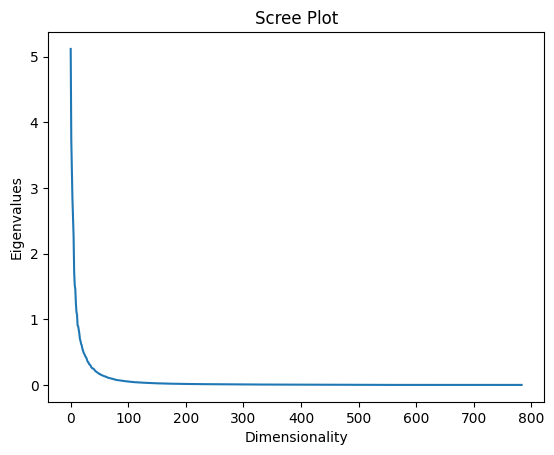

In [45]:
# lets do a scree plot to view eigenvalues:
plt.plot(eigenvalues)
plt.xlabel('Dimensionality')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.show()

In [46]:
# Using this, we want to take cut out most dimensions where eigenvalues are closest to 0:

# lets try d = 90

top_eigenvectors = eigenvectors[:, :90]
features_pca = np.dot(features.view(-1, 28 * 28).numpy(), top_eigenvectors)

# Perform training, testing

# Split the dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features.view(-1, 28 * 28).numpy().dot(top_eigenvectors), labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(features_train, labels_train)

# Predict on the testing set
predictions = model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 90: {accuracy * 100:.2f}%')



Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 90: 92.05%


c:\Users\koola\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# d = 20:

top_eigenvectors = eigenvectors[:, :20]
features_pca = np.dot(features.view(-1, 28 * 28).numpy(), top_eigenvectors)

# Perform training, testing

# Split the dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features.view(-1, 28 * 28).numpy().dot(top_eigenvectors), labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(features_train, labels_train)

# Predict on the testing set
predictions = model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 20: {accuracy * 100:.2f}%')


Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 20: 87.49%


c:\Users\koola\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# d = 5:

top_eigenvectors = eigenvectors[:, :5]
features_pca = np.dot(features.view(-1, 28 * 28).numpy(), top_eigenvectors)

# Perform training, testing

# Split the dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features.view(-1, 28 * 28).numpy().dot(top_eigenvectors), labels, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(features_train, labels_train)

# Predict on the testing set
predictions = model.predict(features_test)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f'Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 5: {accuracy * 100:.2f}%')

Accuracy of the Logistic Regression model on the MNIST dataset after PCA d = 5: 67.04%


c:\Users\koola\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Q4. PCA for cluster visualization

In [55]:
from tqdm import tqdm
# MNIST Dataset: 

# From torch vision
digits = datasets.MNIST(root='data', download=True, transform=transforms.ToTensor())

def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

def kmeans_digits(data, k, similarity, max_iter=30):
    # Initialize cluster centers
    centers = data[np.random.choice(data.shape[0], k, replace=False)].numpy()

    for i in tqdm(range(max_iter)):
        # Assign each data point to the nearest cluster center - E-step (best memberships closest to centers)
        clusters = [[] for _ in range(k)]
        for idx, x in enumerate(data.numpy()): # lifestyle wise similar
            cluster = min(range(k), key=lambda c: similarity(x, centers[c]))

            clusters[cluster].append(idx)

        # Update cluster centers - M-step (not changing memberships)
        new_centers = [np.mean(data.numpy()[clusters[c]], axis=0) for c in range(k)]

        # Check for convergence
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers
        
    return centers, clusters

kmeans_digits_result = kmeans_digits(digits.data, 10, euclidean_distance)

100%|██████████| 30/30 [01:49<00:00,  3.66s/it]


In [56]:
# run PCA on the data

# top 3 eigenvalues/vectors
top_eigenvectors = eigenvectors[:, :3]

# Project the data onto the top 3 eigenvectors
features_pca = np.dot(digits.data.view(-1, 28 * 28).numpy(), top_eigenvectors)



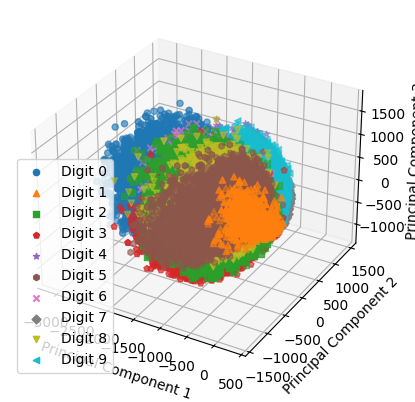

In [62]:
# Plot data points in 3D. use shapes to indicate truth digit label (circle, triangle, "+", stars, etc and colors to indicate cluster membership (red blue green etc))
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ensure features_pca is a numpy array
features_pca = np.array(features_pca)

# Plot the data points
markers = ['o', '^', 's', 'p', '*', 'h', 'x', 'D', 'v', '<']
for i in range(10):
    ax.scatter(features_pca[digits.targets.numpy() == i, 0], features_pca[digits.targets.numpy() == i, 1], features_pca[digits.targets.numpy() == i, 2], label=f'Digit {i}', marker=markers[i])

# Plot the cluster centers
centers = np.array(kmeans_digits_result[0])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()

In [63]:
# Select other 3 at random eigenvalues from top 20, redo plot for each time 

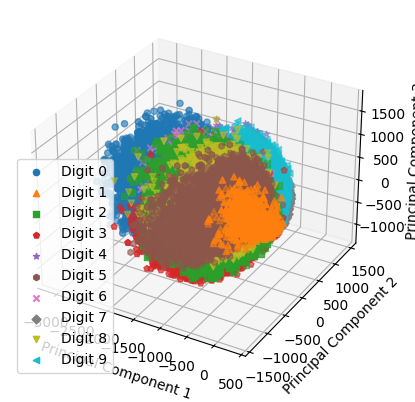

In [64]:
# d = 7
top_eigenvectors = eigenvectors[:, :7]
features_pca = np.dot(digits.data.view(-1, 28 * 28).numpy(), top_eigenvectors)

# Plot data points in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ensure features_pca is a numpy array
features_pca = np.array(features_pca)

# Plot the data points
markers = ['o', '^', 's', 'p', '*', 'h', 'x', 'D', 'v', '<']
for i in range(10):
    ax.scatter(features_pca[digits.targets.numpy() == i, 0], features_pca[digits.targets.numpy() == i, 1], features_pca[digits.targets.numpy() == i, 2], label=f'Digit {i}', marker=markers[i])

# Plot the cluster centers
centers = np.array(kmeans_digits_result[0])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()

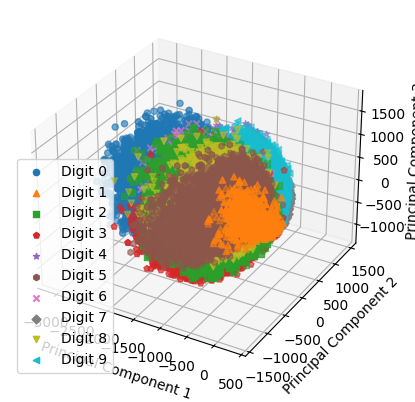

In [65]:
# d = 19
top_eigenvectors = eigenvectors[:, :19]
features_pca = np.dot(digits.data.view(-1, 28 * 28).numpy(), top_eigenvectors)

# Plot data points in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ensure features_pca is a numpy array
features_pca = np.array(features_pca)

# Plot the data points
markers = ['o', '^', 's', 'p', '*', 'h', 'x', 'D', 'v', '<']
for i in range(10):
    ax.scatter(features_pca[digits.targets.numpy() == i, 0], features_pca[digits.targets.numpy() == i, 1], features_pca[digits.targets.numpy() == i, 2], label=f'Digit {i}', marker=markers[i])

# Plot the cluster centers
centers = np.array(kmeans_digits_result[0])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()

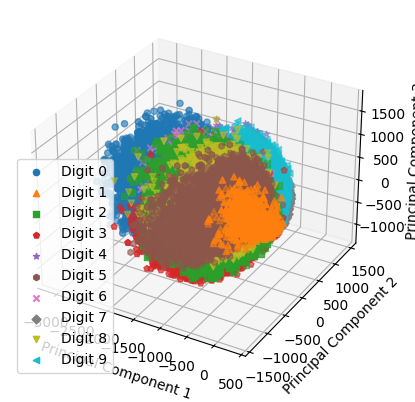

In [68]:
# d = 12
top_eigenvectors = eigenvectors[:, :12]
features_pca = np.dot(digits.data.view(-1, 28 * 28).numpy(), top_eigenvectors)

# Plot data points in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Ensure features_pca is a numpy array
features_pca = np.array(features_pca)

# Plot the data points
markers = ['o', '^', 's', 'p', '*', 'h', 'x', 'D', 'v', '<']
for i in range(10):
    ax.scatter(features_pca[digits.targets.numpy() == i, 0], features_pca[digits.targets.numpy() == i, 1], features_pca[digits.targets.numpy() == i, 2], label=f'Digit {i}', marker=markers[i])

# Plot the cluster centers
centers = np.array(kmeans_digits_result[0])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()